<a href="https://colab.research.google.com/github/Givemeeee/face_recognize/blob/main/%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

安裝人臉辨識模組


In [1]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=c167bc74c26dac5a04aa3e4dd1449a5de99f0db37a859b7dbf2efbec7ba09211
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [32]:
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw

In [34]:
fileName = '/content/drive/MyDrive/people/lai.jpg'
image = face_recognition.load_image_file(fileName)
box = face_recognition.face_locations(image)
print(box)

[(142, 390, 365, 167)]


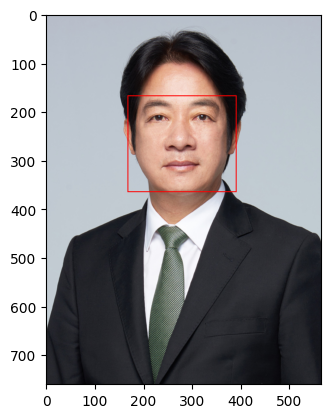

In [35]:
img=Image.open(fileName)
draw = ImageDraw.Draw(img)
for i in range(len(box)):
  draw.rectangle((box[i][3],box[i][3],box[i][1],box[i][2]),outline='red',width=2)
plt.imshow(img)
plt.show()

# **人臉辨識判斷是否為同一人**


In [5]:
face1 = '/content/drive/MyDrive/people/water.jpg'
face2 = '/content/drive/MyDrive/people/water2.jpg'
faceimg1 = face_recognition.load_image_file(face1)
faceimg2 = face_recognition.load_image_file(face2)

In [6]:
know_face = face_recognition.face_encodings(faceimg1)
test_face = face_recognition.face_encodings(faceimg2)


In [7]:
face_distance = face_recognition.face_distance([know_face[0]],test_face[0])
face_distance

array([0.47562226])

In [8]:
if face_distance < 0.4 :
  print('是同一位')
else:
  print('不同人')

不同人


In [9]:
peo1='/content/drive/MyDrive/people/cloud2.jpg'
peo2='/content/drive/MyDrive/people/lai.jpg'
peo3='/content/drive/MyDrive/people/rain.jpg'
peo4='/content/drive/MyDrive/people/water.jpg'
peo5='/content/drive/MyDrive/people/uncle.jpg'
Name = ['宋芸樺','賴清德','夏雨喬','陳水扁','柯文哲']
pimg1 = face_recognition.load_image_file(peo1)
pimg2 = face_recognition.load_image_file(peo2)
pimg3 = face_recognition.load_image_file(peo3)
pimg4 = face_recognition.load_image_file(peo4)
pimg5 = face_recognition.load_image_file(peo5)

In [10]:
encoding1 = face_recognition.face_encodings(pimg1)[0]
encoding2 = face_recognition.face_encodings(pimg2)[0]
encoding3 = face_recognition.face_encodings(pimg3)[0]
encoding4 = face_recognition.face_encodings(pimg4)[0]
encoding5 = face_recognition.face_encodings(pimg5)[0]

In [11]:
know_face = [encoding1,encoding2,encoding3,encoding4,encoding5]

In [12]:
result = face_recognition.compare_faces(know_face,encoding4,0.4)
result

[False, False, False, True, False]

In [13]:
facename=''
for i in range(len(result)):
  if result[i]:
    facename+=Name[i]+','
if facename == '':
  print('Not found')
else:
  print(facename)

陳水扁,


# 人臉鏡頭捕捉


In [ ]:
images = face_recognition.face_landmarks(pimg1)
images

In [28]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))